<a href="https://colab.research.google.com/github/Mik3Mu/group-5-carbon-food-print/blob/main/Classification_Google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#------------------------Classification Models TechLabs Group 5---------------------

#Table of Contents for this file:
#1.Import Moduls
#2.Settings
#3.Import CSV File
#4.Checking missing data points
#5.Split Data in Training and Test Sets
#6. Creating 7 Classification Models
#7. Applying Feature Importance
#8.Cross Validations for all models
#9. Classification Report for every Model
#10.Confusion matrix for every model
#11. ROC/AUC/PrecisionRecallCurve for every model
#12.Plot ROC/AUC Curve
#13.Precision-Recall Curve

In [2]:
#1.Import Moduls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve)
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
#2.Settings
#Start Time for Script Running time
start = time.time()

#Settings for displaying tables
desired_width = 320
pd.set_option("display.width", desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
#3.Import CSV File
url = "https://drive.google.com/file/d/1gq-pD4aSLdp48GGM6fTHzCeJGkz_qFiN/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
food_data = pd.read_csv(url)

#If printing the data is necessary:
print(food_data)

     Unnamed: 0  Unnamed: 0.1                                Product         Type Country of Origin Method of Transportation             Organic            Seasonal Type of Packaging         Processed  CO2_Equivalent_per_Kilo                                             Source  food_emissions_processing  \
0             0             0                         Apple Juice 1L       Drinks               NaN                      1.0                 NaN                True              Glas         processed                 0.400000                                         IFEU study               1.600000e-02   
1             1             1                                 Apples        Fruit           Germany                      NaN                 0.5                True               NaN       unprocessed                 0.300000                                         IFEU study               7.500000e-18   
2             2             2                                 Apples        Fru

In [6]:
#5.Split Data in Training and Test Sets
# X_all=all emission columns minus CO2_Equivalent_per_Kilo
# y_all=Predict Columns, which is CO2_Equivalent_per_Kilo

X_all = food_data[["food_emissions_land_use", "food_emissions_farm", "food_emissions_animal_feed", "food_emissions_processing",
     "food_emissions_transport", "food_emissions_retail", "food_emissions_packaging"]]

#Changing Predict Column to 0 and 1
y_all = np.where(food_data["CO2_Equivalent_per_Kilo"]> 5, 1,0).astype(int)
#print("CO2_Equivalent_per_Kilo over 5:"), if necessary:
#print(y_all)

#Proportion of test data:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [7]:
#6. Creating 7 Classification Models

#Used models, all within sklearn:
#k-nearest neighbors
#Logistic Regression
#C-Support Vector Classification - Linear
#C-Support Vector Classification - rbf'
#RandomForest
#Decision Tree
#Gaussian Naive Bayes


#Testing 7 Models for Accuracy:
#empty list for the loop
my_list = []
#Name of applied models
classifiers = ['k-nearest neighbors', 'Logistic Regression', 'C-Support Vector Classification - Linear', 'C-Support Vector Classification - rbf', 'RandomForest', 'Decision Tree', 'Gaussian Naive Bayes']
models=[KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        RandomForestClassifier(n_estimators=100,random_state=0),
        DecisionTreeClassifier(),
        GaussianNB()]

#Loop for the models
for i in models:
    model = i
    #fit the train data for every model
    model.fit(X_train,y_train)
    #predict outcomes with test data
    prediction=model.predict(X_test)
    #Store accuracy_score to empty list
    my_list.append(metrics.accuracy_score(prediction,y_test))
#Creating and sorting list for Model Accurarcy
models_dataframe = pd.DataFrame(my_list,index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe = models_dataframe.sort_values(['Accuracy'], ascending=[0])
print(models_dataframe)

                                          Accuracy
Logistic Regression                       0.969697
C-Support Vector Classification - Linear  0.969697
Decision Tree                             0.969697
k-nearest neighbors                       0.939394
C-Support Vector Classification - rbf     0.909091
RandomForest                              0.909091
Gaussian Naive Bayes                      0.818182


In [8]:
#7. Applying Feature Importance

#Feature Importance in Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
predictionLR = model_LR.predict(X_train)
#Getting the feature importance for Logistic Regression
feature_importance_LR = pd.DataFrame({'Feature':list(X_train.columns),'Feature Importance Logistic Regression':[abs(i) for i in model_LR.coef_[0]]})
#Sorting the outcome
sorted_feature_importance_LR = feature_importance_LR.sort_values('Feature Importance Logistic Regression',ascending=False)
#printing the results
print(sorted_feature_importance_LR)


#Feature Importance in RandomForest
model_RF = RandomForestClassifier(n_estimators=100,random_state=0)
model_RF.fit(X_train,y_train)
#Using feature_importances_ for getting the RandomForest features
feature_importance_RF = pd.DataFrame({'Feature':list(X_train.columns),'Feature Importance RandomForest':model_RF.feature_importances_})
#Sorting the outcome
sorted_feature_importance_RF = feature_importance_RF.sort_values('Feature Importance RandomForest',ascending=False)
#printing the results
print(sorted_feature_importance_RF)

                      Feature  Feature Importance Logistic Regression
1         food_emissions_farm                                1.956054
0     food_emissions_land_use                                1.449253
2  food_emissions_animal_feed                                1.313735
3   food_emissions_processing                                0.419589
6    food_emissions_packaging                                0.343106
4    food_emissions_transport                                0.276428
5       food_emissions_retail                                0.141330
                      Feature  Feature Importance RandomForest
1         food_emissions_farm                         0.357763
2  food_emissions_animal_feed                         0.226224
0     food_emissions_land_use                         0.211276
3   food_emissions_processing                         0.099350
6    food_emissions_packaging                         0.047217
5       food_emissions_retail                         0.033553

In [9]:
#8.Cross Validations for all models

#kFold with 10 splits
kfold = KFold(n_splits=10)

#empty lists for the loop
my_list_2=[]
accuracy=[]
#Name of the models for cross validation
classifiers = ['k-nearest neighbors', 'Logistic Regression', 'C-Support Vector Classification - Linear', 'C-Support Vector Classification - rbf', 'RandomForest', 'Decision Tree', 'Gaussian Naive Bayes']
models=[KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        RandomForestClassifier(n_estimators=100,random_state=0),
        DecisionTreeClassifier(),
        GaussianNB()]

#Loop for the cross validations
for i in models:
    model = i
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    my_list_2.append(cv_result.mean())
    accuracy.append(cv_result)

#Creating and sorting list for cross validation
cv_models_dataframe=pd.DataFrame(my_list_2, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe = cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])
print(cv_models_dataframe)

                                           CV Mean
Logistic Regression                       0.976923
C-Support Vector Classification - Linear  0.976923
RandomForest                              0.976923
Decision Tree                             0.969231
k-nearest neighbors                       0.960897
C-Support Vector Classification - rbf     0.960897
Gaussian Naive Bayes                      0.944872


In [10]:
#9.Classification Report for every Model

#empty lists for the loop
my_list = []
classifiers = ['k-nearest neighbors', 'Logistic Regression', 'C-Support Vector Classification - Linear', 'C-Support Vector Classification - rbf', 'RandomForest', 'Decision Tree', 'Gaussian Naive Bayes']
models=[KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        RandomForestClassifier(n_estimators=100,random_state=0),
        DecisionTreeClassifier(),
        GaussianNB()]

#Loop for the classification reports
for i, j in zip(models, classifiers):
    model = i
    #classifier name for the header
    classifier = j
    #Fit all models with the train data
    model.fit(X_train,y_train)
    #Predict the outcome with the test data
    prediction=model.predict(X_test)
    #Printing the models with the header classifier
    print(classifier,"Classification Report")
    #print classification reports
    print(metrics.classification_report(y_test, prediction))

k-nearest neighbors Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.88      0.88      0.88         8

    accuracy                           0.94        33
   macro avg       0.92      0.92      0.92        33
weighted avg       0.94      0.94      0.94        33

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.89      1.00      0.94         8

    accuracy                           0.97        33
   macro avg       0.94      0.98      0.96        33
weighted avg       0.97      0.97      0.97        33

C-Support Vector Classification - Linear Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.89      1.00      0.94         8

    accuracy                       

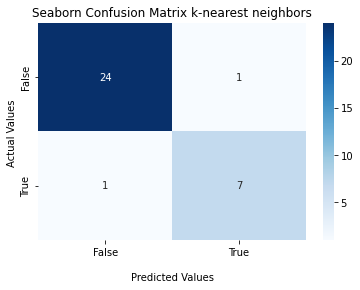

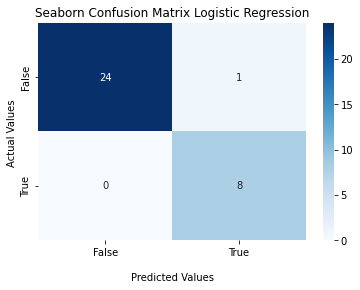

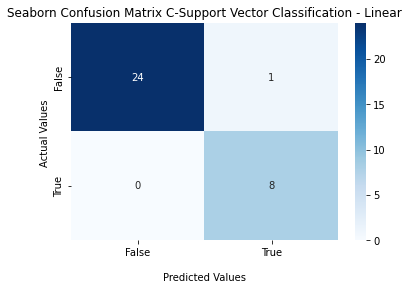

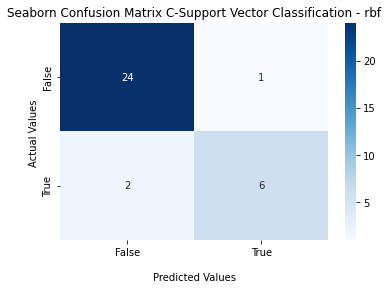

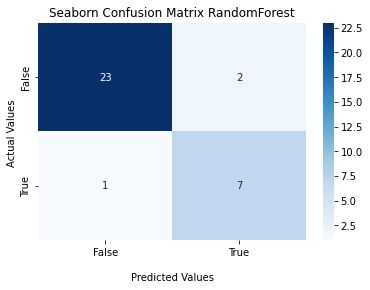

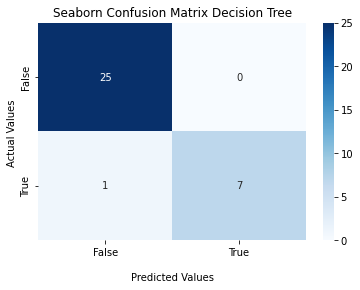

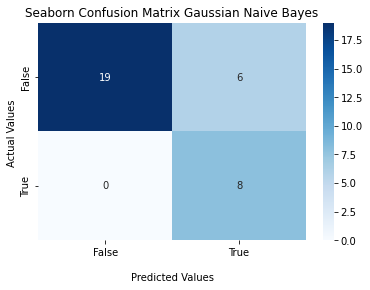

In [11]:
#10.Confusion matrix for every model

#empty lists for the loop
my_list = []
classifiers = ['k-nearest neighbors', 'Logistic Regression', 'C-Support Vector Classification - Linear', 'C-Support Vector Classification - rbf', 'RandomForest', 'Decision Tree', 'Gaussian Naive Bayes']
models=[KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        RandomForestClassifier(n_estimators=100,random_state=0),
        DecisionTreeClassifier(),
        GaussianNB()]

#Loop for showing the confusion matrix loop for every model
for i, j in zip(models, classifiers):
    model = i
    #classifier name for the header
    classifier = j
    #Fit all models with the train data
    model.fit(X_train,y_train)
    #Predict the outcome with the test data
    prediction=model.predict(X_test)
    #Creating the confusion matrix for all models
    matrix = confusion_matrix(y_test, prediction)
    #Setting up the graphs with Seaborn
    ax = sns.heatmap(matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix' + " " + classifier);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    #Ticket labels
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])

    #Display the visualization of the Confusion Matrix.
    plt.show()

In [12]:
#11. ROC/AUC/PrecisionRecallCurve for every model

#k-nearest neighbors
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train,y_train)
#Compute predicted probabilities
y_pred_prob_KNN = model_KNN.predict_proba(X_test)[:,1]
#Generate ROC curve values fpr, tpr, thresholds
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
AUC_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


#Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
#Compute predicted probabilities
y_pred_prob_LR = model_LR.predict_proba(X_test)[:,1]
#Generate ROC curve values fpr, tpr, thresholds
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_prob_LR)
AUC_LR = auc(fpr_LR, tpr_LR)
precision_LR, recall_LR, th_LR = precision_recall_curve(y_test, y_pred_prob_LR)


#C-Support Vector Classification - Linear
model_SVCL=svm.SVC(kernel='linear', probability=True)
model_SVCL.fit(X_train,y_train)
y_pred_prob_SVCL = model_SVCL.predict_proba(X_test)[:,1]
fpr_SVCL, tpr_SVCL, thresholds_SVCL = roc_curve(y_test, y_pred_prob_SVCL)
AUC_SVCL = auc(fpr_SVCL, tpr_SVCL)
precision_SVCL, recall_SVCL, th_SVCL = precision_recall_curve(y_test, y_pred_prob_SVCL)


#C-Support Vector Classification - rbf',
model_SVCrbf=svm.SVC(kernel='rbf', probability=True)
model_SVCrbf.fit(X_train,y_train)
y_pred_prob_SVCrbf = model_SVCrbf.predict_proba(X_test)[:,1]
fpr_SVCrbf, tpr_SVCrbf, thresholds_SVCrbf = roc_curve(y_test, y_pred_prob_SVCrbf)
AUC_SVCrbf = auc(fpr_SVCrbf, tpr_SVCrbf)
precision_SVCrbf, recall_SVCrbf, th_SVCrbf = precision_recall_curve(y_test, y_pred_prob_SVCrbf)


#RandomForest
model_RF= RandomForestClassifier(n_estimators=100,random_state=0)
model_RF.fit(X_train,y_train)
y_pred_prob_RF = model_RF.predict_proba(X_test)[:,1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_prob_RF)
AUC_RF = auc(fpr_RF, tpr_RF)
precision_RF, recall_RF, th_RF = precision_recall_curve(y_test, y_pred_prob_RF)


#Decision Tree
model_Tree=DecisionTreeClassifier()
model_Tree.fit(X_train,y_train)
y_pred_prob_Tree = model_Tree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
AUC_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)


#Gaussian Naive Bayes
model_GNB= GaussianNB()
model_GNB.fit(X_train,y_train)
y_pred_prob_GNB = model_GNB.predict_proba(X_test)[:,1]
fpr_GNB, tpr_GNB, thresholds_GNB = roc_curve(y_test, y_pred_prob_GNB)
AUC_GNB = auc(fpr_GNB, tpr_GNB)
precision_GNB, recall_GNB, th_GNB = precision_recall_curve(y_test, y_pred_prob_GNB)

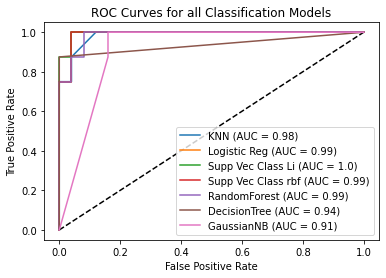

In [13]:
#12.Plot ROC/AUC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN (AUC = ' + str(round(AUC_KNN, 2)) + ")")
plt.plot(fpr_LR, tpr_LR, label='Logistic Reg (AUC = ' + str(round(AUC_LR, 2)) + ")")
plt.plot(fpr_SVCL, tpr_SVCL, label='Supp Vec Class Li (AUC = ' + str(round(AUC_SVCL, 2)) + ")")
plt.plot(fpr_SVCrbf, tpr_SVCrbf, label='Supp Vec Class rbf (AUC = ' + str(round(AUC_SVCrbf, 2)) + ")")
plt.plot(fpr_RF, tpr_RF, label='RandomForest (AUC = ' + str(round(AUC_RF, 2)) + ")")
plt.plot(fpr_Tree, tpr_Tree, label='DecisionTree (AUC = ' + str(round(AUC_Tree, 2)) + ")")
plt.plot(fpr_GNB, tpr_GNB, label='GaussianNB (AUC = ' + str(round(AUC_GNB, 2)) + ")")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classification Models')
plt.legend(loc='best')
plt.show()

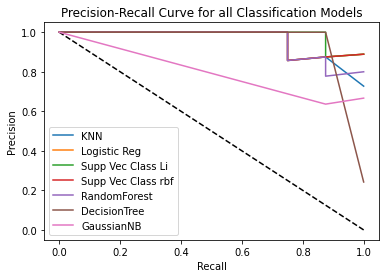

In [14]:
#13.Precision-Recall Curve
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_LR, precision_LR, label='Logistic Reg')
plt.plot(recall_SVCL, precision_SVCL, label='Supp Vec Class Li')
plt.plot(recall_SVCrbf, precision_SVCrbf, label='Supp Vec Class rbf')
plt.plot(recall_RF, precision_RF, label='RandomForest')
plt.plot(recall_Tree, precision_Tree, label='DecisionTree')
plt.plot(recall_GNB, precision_GNB, label='GaussianNB')
plt.title('Precision-Recall Curve for all Classification Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()